In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
df= pd.read_csv('2020_Competition_Training (1).csv')

# df = pd.read_csv('2020_Competition_Holdout .csv')
# df['transportation_issues'] = 0

/root/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (80,193) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 2. PROCEDURES
Why are NA values present in Procedure. Some of the procedures are important in understanding

In [2]:
#betos - Berenson-Eggers Type of Service (BETOS) categories are used to analyze Medicare costs. Created to know how expenditures
#are growing across categories
#contains seven main categories
# Evaluation and Management
# Procedures
# Imaging
# Tests
# Durable Medical Equipment
# Other
# Exceptions/Unclassified
#A person can be given multiple betos services for eg- he/she might be tested for imaging and then suggest a medical
#equipment

#The analysis we can come up with is the combination of betos happening eg- heart attack - ambulance, screening, surgery etc
#maybe apriori


#Drug GPI - 100 attributes can be taken by a person - sheet name - GPI - indicates if the person is using the drug
#count ct is the number of tablets/no. of times/the amount of dose of the drug is used by the person
#per 

In [3]:
betos_df= df.filter(items=['person_id_syn',
'transportation_issues',
'betos_d1c_ind',
'betos_d1c_pmpm_ct',
'betos_d1d_ind',
'betos_d1d_pmpm_ct',
'betos_m1b_ind',
'betos_m1b_pmpm_ct',
'betos_m2c_ind',
'betos_m2c_pmpm_ct',
'betos_m5b_ind',
'betos_m5b_pmpm_ct',
'betos_m5c_ind',
'betos_m5c_pmpm_ct',
'betos_m5d_ind',
'betos_m5d_pmpm_ct',
'betos_o1a_ind',
'betos_o1a_pmpm_ct',
'betos_o1b_ind',
'betos_o1b_pmpm_ct',
'betos_o1e_ind',
'betos_o1e_pmpm_ct',
'betos_o1g_ind',
'betos_o1g_pmpm_ct',
'betos_t1a_ind',
'betos_t1a_pmpm_ct',
'betos_t1b_ind',
'betos_t1b_pmpm_ct',
'betos_t1e_ind',
'betos_t1e_pmpm_ct',
'betos_t1h_ind',
'betos_t1h_pmpm_ct',
'betos_t2a_ind',
'betos_t2a_pmpm_ct',
'betos_y2_ind',
'betos_y2_pmpm_ct'
])

# 1. EVALUATION AND MANAGEMENT


In [4]:
# 1. M1A OFFICE VISITS - NEW
# 2. M1B OFFICE VISITS - ESTABLISHED
# 3. M2A HOSPITAL VISIT - INITIAL
# 4. M2B HOSPITAL VISIT - SUBSEQUENT
# 5. M2C HOSPITAL VISIT - CRITICAL CARE
# 6. M3 EMERGENCY ROOM VISIT
# 7. M4A HOME VISIT
# 8. M4B NURSING HOME VISIT
# 9. M5A SPECIALIST - PATHOLOGY
# 10.M5B SPECIALIST - PSYCHIATRY
# 11.M5C SPECIALIST - OPHTHALMOLOGY
# 12.M5D SPECIALIST - OTHER
# 13.M6 CONSULTATIONS


In [5]:
EVAL_columns = [s for s in betos_df if 'betos_m' in s]


# 'betos_m1b_ind',
# 'betos_m1b_pmpm_ct',
# 'betos_m2c_ind',
# 'betos_m2c_pmpm_ct',
# 'betos_m5b_ind',
# 'betos_m5b_pmpm_ct',
# 'betos_m5c_ind',
# 'betos_m5c_pmpm_ct',
# 'betos_m5d_ind',
# 'betos_m5d_pmpm_ct',


EVAL_ind_columns = [s for s in EVAL_columns if 'ind' in s] #only ind columns
EVAL_pmpm_columns = [s for s in EVAL_columns if 'pmpm' in s] #only pmpm columns

total_EVAL_pmpm = 0
total_EVAL_ind = 0

for i,j in zip(EVAL_ind_columns, EVAL_pmpm_columns):
    total_EVAL_pmpm += betos_df[betos_df[j] != 0][j].sum()
    total_EVAL_ind += (betos_df[i] != 0).sum()
    print("The sum of pmpm in ",j,betos_df[betos_df[j] != 0][j].sum())
    print("Maximum value in the column",j, betos_df[j].max())
    print("number of non -zeros in ", i, (betos_df[i] != 0).sum())
    if (betos_df[i] !=0).sum() ==0:
        print("column ", i, "is not usefulllllllllllllllllllllllllllllllllllllllllll")
    else:
        print('percentage of patients having',i, 'issue and do not have transportation issue is',betos_df[betos_df[i] ==1].transportation_issues.value_counts()[0]/betos_df[betos_df[i] ==1].shape[0])
#     sns.distplot(betos_df[j])
#     plt.show()
    print('='*100)



#row wise addition of the indices columns only to know if a patient has multiple CONGENITAL ANOMALIES
betos_df['EVAL_ind_sum'] = betos_df[[c for c in betos_df.columns if c in EVAL_ind_columns]].sum(axis=1)
betos_df['EVAL_pmpm_sum'] = betos_df[[c for c in betos_df.columns if c in EVAL_pmpm_columns]].sum(axis=1)
print(betos_df.EVAL_ind_sum.value_counts())
#15 patients having 2 congenital anomalies


print("percentage of people having EVAL issue",(betos_df[betos_df.EVAL_ind_sum>0].shape[0]/betos_df.shape[0]))

print("percentage of people had atleast 1 eval and have transportation issues ",\
      (1 - betos_df[betos_df.EVAL_ind_sum>0].transportation_issues.value_counts()[0]/betos_df[betos_df.EVAL_ind_sum>0].shape[0]))

The sum of pmpm in  betos_m1b_pmpm_ct 45311.621672346
Maximum value in the column betos_m1b_pmpm_ct 6.25
number of non -zeros in  betos_m1b_ind 65023
percentage of patients having betos_m1b_ind issue and do not have transportation issue is 0.8555126647493964
The sum of pmpm in  betos_m2c_pmpm_ct 437.042686646
Maximum value in the column betos_m2c_pmpm_ct 1.75
number of non -zeros in  betos_m2c_ind 2351
percentage of patients having betos_m2c_ind issue and do not have transportation issue is 0.7741386643981285
The sum of pmpm in  betos_m5b_pmpm_ct 1534.455509214
Maximum value in the column betos_m5b_pmpm_ct 4.909091
number of non -zeros in  betos_m5b_ind 4240
percentage of patients having betos_m5b_ind issue and do not have transportation issue is 0.7429245283018868
The sum of pmpm in  betos_m5c_pmpm_ct 4649.778789565999
Maximum value in the column betos_m5c_pmpm_ct 1.4166666
number of non -zeros in  betos_m5c_ind 30509
percentage of patients having betos_m5c_ind issue and do not have t

# Procedures _ NO columns

# Imaging - No columns

# Tests

In [6]:
TEST_columns = [s for s in betos_df if 'betos_t' in s]


# ['betos_t1a_ind',
#  'betos_t1a_pmpm_ct',
#  'betos_t1b_ind',
#  'betos_t1b_pmpm_ct',
#  'betos_t1e_ind',
#  'betos_t1e_pmpm_ct',
#  'betos_t1h_ind',
#  'betos_t1h_pmpm_ct',
#  'betos_t2a_ind',
#  'betos_t2a_pmpm_ct']

TEST_ind_columns = [s for s in TEST_columns if 'ind' in s] #only ind columns
TEST_pmpm_columns = [s for s in TEST_columns if 'pmpm' in s] #only pmpm columns

total_TEST_pmpm = 0
total_TEST_ind = 0

for i,j in zip(TEST_ind_columns, TEST_pmpm_columns):
    total_TEST_pmpm += betos_df[betos_df[j] != 0][j].sum()
    total_TEST_ind += (betos_df[i] != 0).sum()
    print("The sum of pmpm in ",j,betos_df[betos_df[j] != 0][j].sum())
    print("Maximum value in the column",j, betos_df[j].max())
    print("number of non -zeros in ", i, (betos_df[i] != 0).sum())
    if (betos_df[i] !=0).sum() ==0:
        print("column ", i, "is not usefulllllllllllllllllllllllllllllllllllllllllll")
    else:
        print('percentage of patients having',i, 'issue and do not have transportation issue is',betos_df[betos_df[i] ==1].transportation_issues.value_counts()[0]/betos_df[betos_df[i] ==1].shape[0])
#     sns.distplot(betos_df[j])
#     plt.show()
    print('='*100)



#row wise addition of the indices columns only to know if a patient has multiple CONGENITAL ANOMALIES
betos_df['TEST_ind_sum'] = betos_df[[c for c in betos_df.columns if c in TEST_ind_columns]].sum(axis=1)
betos_df['TEST_pmpm_sum'] = betos_df[[c for c in betos_df.columns if c in TEST_pmpm_columns]].sum(axis=1)
print(betos_df.TEST_ind_sum.value_counts())
#15 patients having 2 congenital anomalies

print("percentage of people having TEST issue",(betos_df[betos_df.TEST_ind_sum>0].shape[0]/betos_df.shape[0]))

print("percentage of people had atleast 1 eval and have transportation issues ",\
      (1 - betos_df[betos_df.TEST_ind_sum>0].transportation_issues.value_counts()[0]/betos_df[betos_df.TEST_ind_sum>0].shape[0]))

The sum of pmpm in  betos_t1a_pmpm_ct 14187.458811614
Maximum value in the column betos_t1a_pmpm_ct 3.9166667
number of non -zeros in  betos_t1a_ind 54530
percentage of patients having betos_t1a_ind issue and do not have transportation issue is 0.8619658903355951
The sum of pmpm in  betos_t1b_pmpm_ct 13000.393590912001
Maximum value in the column betos_t1b_pmpm_ct 6.3333335
number of non -zeros in  betos_t1b_ind 52900
percentage of patients having betos_t1b_ind issue and do not have transportation issue is 0.8533081285444234
The sum of pmpm in  betos_t1e_pmpm_ct 1922.9203936109998
Maximum value in the column betos_t1e_pmpm_ct 3.3333333
number of non -zeros in  betos_t1e_ind 9058
percentage of patients having betos_t1e_ind issue and do not have transportation issue is 0.8047030249503202
The sum of pmpm in  betos_t1h_pmpm_ct 22336.04649834
Maximum value in the column betos_t1h_pmpm_ct 7.083333500000001
number of non -zeros in  betos_t1h_ind 63212
percentage of patients having betos_t1h_i

# 5. DURABLE MEDICAL EQUIPMENT


In [7]:
DUR_columns = [s for s in betos_df if 'betos_d' in s]


# ['betos_d1c_ind', 'betos_d1c_pmpm_ct', 'betos_d1d_ind', 'betos_d1d_pmpm_ct']

DUR_ind_columns = [s for s in DUR_columns if 'ind' in s] #only ind columns
DUR_pmpm_columns = [s for s in DUR_columns if 'pmpm' in s] #only pmpm columns

total_DUR_pmpm = 0
total_DUR_ind = 0

for i,j in zip(DUR_ind_columns, DUR_pmpm_columns):
    total_DUR_pmpm += betos_df[betos_df[j] != 0][j].sum()
    total_DUR_ind += (betos_df[i] != 0).sum()
    print("The sum of pmpm in ",j,betos_df[betos_df[j] != 0][j].sum())
    print("Maximum value in the column",j, betos_df[j].max())
    print("number of non -zeros in ", i, (betos_df[i] != 0).sum())
    if (betos_df[i] !=0).sum() ==0:
        print("column ", i, "is not usefulllllllllllllllllllllllllllllllllllllllllll")
    else:
        print('percentage of patients having',i, 'issue and do not have transportation issue is',betos_df[betos_df[i] ==1].transportation_issues.value_counts()[0]/betos_df[betos_df[i] ==1].shape[0])
#     sns.distplot(betos_df[j])
#     plt.show()
    print('='*100)



#row wise addition of the indices columns only to know if a patient has multiple CONGENITAL ANOMALIES
betos_df['DUR_ind_sum'] = betos_df[[c for c in betos_df.columns if c in DUR_ind_columns]].sum(axis=1)
betos_df['DUR_pmpm_sum'] = betos_df[[c for c in betos_df.columns if c in DUR_pmpm_columns]].sum(axis=1)
print(betos_df.DUR_ind_sum.value_counts())
#15 patients having 2 congenital anomalies

print("percentage of people having DUR issue",(betos_df[betos_df.DUR_ind_sum>0].shape[0]/betos_df.shape[0]))

print("percentage of people had atleast 1 dur and have transportation issues ",(1 - betos_df[betos_df.DUR_ind_sum>0].transportation_issues.value_counts()[0]/betos_df[betos_df.DUR_ind_sum>0].shape[0]))

The sum of pmpm in  betos_d1c_pmpm_ct 2749.9355319489996
Maximum value in the column betos_d1c_pmpm_ct 2.2582781
number of non -zeros in  betos_d1c_ind 3165
percentage of patients having betos_d1c_ind issue and do not have transportation issue is 0.7819905213270142
The sum of pmpm in  betos_d1d_pmpm_ct 500.738941967
Maximum value in the column betos_d1d_pmpm_ct 1.5057143
number of non -zeros in  betos_d1d_ind 1073
percentage of patients having betos_d1d_ind issue and do not have transportation issue is 0.7306616961789375
0    65487
1     3932
2      153
Name: DUR_ind_sum, dtype: int64
percentage of people having DUR issue 0.058716150175357903
percentage of people had atleast 1 dur and have transportation issues  0.22545899632802935


# 6. OTHER


In [8]:
OTH_columns = [s for s in betos_df if 'betos_o' in s]


# ['betos_o1a_ind',
#  'betos_o1a_pmpm_ct',
#  'betos_o1b_ind',
#  'betos_o1b_pmpm_ct',
#  'betos_o1e_ind',
#  'betos_o1e_pmpm_ct',
#  'betos_o1g_ind',
#  'betos_o1g_pmpm_ct']

OTH_ind_columns = [s for s in OTH_columns if 'ind' in s] #only ind columns
OTH_pmpm_columns = [s for s in OTH_columns if 'pmpm' in s] #only pmpm columns

total_OTH_pmpm = 0
total_OTH_ind = 0

for i,j in zip(OTH_ind_columns, OTH_pmpm_columns):
    total_OTH_pmpm += betos_df[betos_df[j] != 0][j].sum()
    total_OTH_ind += (betos_df[i] != 0).sum()
    print("The sum of pmpm in ",j,betos_df[betos_df[j] != 0][j].sum())
    print("Maximum value in the column",j, betos_df[j].max())
    print("number of non -zeros in ", i, (betos_df[i] != 0).sum())
    if (betos_df[i] !=0).sum() ==0:
        print("column ", i, "is not usefulllllllllllllllllllllllllllllllllllllllllll")
    else:
        print('percentage of patients having',i, 'issue and do not have transportation issue is',betos_df[betos_df[i] ==1].transportation_issues.value_counts()[0]/betos_df[betos_df[i] ==1].shape[0])
#     sns.distplot(betos_df[j])
#     plt.show()
    print('='*100)



#row wise addition of the indices columns only to know if a patient has multiple CONGENITAL ANOMALIES
betos_df['OTH_ind_sum'] = betos_df[[c for c in betos_df.columns if c in OTH_ind_columns]].sum(axis=1)
betos_df['OTH_pmpm_sum'] = betos_df[[c for c in betos_df.columns if c in OTH_pmpm_columns]].sum(axis=1)
print(betos_df.OTH_ind_sum.value_counts())
#15 patients having 2 congenital anomalies

print("percentage of people having OTH issue",(betos_df[betos_df.OTH_ind_sum>0].shape[0]/betos_df.shape[0]))

print("percentage of people had atleast 1 dur and have transportation issues ",(1 - betos_df[betos_df.OTH_ind_sum>0].transportation_issues.value_counts()[0]/betos_df[betos_df.OTH_ind_sum>0].shape[0]))

The sum of pmpm in  betos_o1a_pmpm_ct 4506.683410694
Maximum value in the column betos_o1a_pmpm_ct 19.25
number of non -zeros in  betos_o1a_ind 9545
percentage of patients having betos_o1a_ind issue and do not have transportation issue is 0.699214248297538
The sum of pmpm in  betos_o1b_pmpm_ct 1571.4169631510001
Maximum value in the column betos_o1b_pmpm_ct 4.2352943
number of non -zeros in  betos_o1b_ind 2198
percentage of patients having betos_o1b_ind issue and do not have transportation issue is 0.9076433121019108
The sum of pmpm in  betos_o1e_pmpm_ct 8453.388529156
Maximum value in the column betos_o1e_pmpm_ct 12.0
number of non -zeros in  betos_o1e_ind 29850
percentage of patients having betos_o1e_ind issue and do not have transportation issue is 0.8310217755443886
The sum of pmpm in  betos_o1g_pmpm_ct 2416.5415619309997
Maximum value in the column betos_o1g_pmpm_ct 0.700565
number of non -zeros in  betos_o1g_ind 23188
percentage of patients having betos_o1g_ind issue and do not h

# 7. EXCEPTIONS/UNCLASSIFIED


In [9]:
EXC_columns = [s for s in betos_df if 'betos_y' in s]

# ['betos_y2_ind', 'betos_y2_pmpm_ct']

EXC_ind_columns = [s for s in EXC_columns if 'ind' in s] #only ind columns
EXC_pmpm_columns = [s for s in EXC_columns if 'pmpm' in s] #only pmpm columns

total_EXC_pmpm = 0
total_EXC_ind = 0

for i,j in zip(EXC_ind_columns, EXC_pmpm_columns):
    total_EXC_pmpm += betos_df[betos_df[j] != 0][j].sum()
    total_EXC_ind += (betos_df[i] != 0).sum()
    print("The sum of pmpm in ",j,betos_df[betos_df[j] != 0][j].sum())
    print("Maximum value in the column",j, betos_df[j].max())
    print("number of non -zeros in ", i, (betos_df[i] != 0).sum())
    if (betos_df[i] !=0).sum() ==0:
        print("column ", i, "is not usefulllllllllllllllllllllllllllllllllllllllllll")
    else:
        print('percentage of patients having',i, 'issue and do not have transportation issue is',betos_df[betos_df[i] ==1].transportation_issues.value_counts()[0]/betos_df[betos_df[i] ==1].shape[0])
#     sns.distplot(betos_df[j])
#     plt.show()
    print('='*100)



#row wise addition of the indices columns only to know if a patient has multiple CONGENITAL ANOMALIES
betos_df['EXC_ind_sum'] = betos_df[[c for c in betos_df.columns if c in EXC_ind_columns]].sum(axis=1)
betos_df['EXC_pmpm_sum'] = betos_df[[c for c in betos_df.columns if c in EXC_pmpm_columns]].sum(axis=1)
print(betos_df.EXC_ind_sum.value_counts())
#15 patients having 2 congenital anomalies

print("percentage of people having EXC issue",(betos_df[betos_df.EXC_ind_sum>0].shape[0]/betos_df.shape[0]))

print("percentage of people had atleast 1 dur and have transportation issues ",(1 - betos_df[betos_df.EXC_ind_sum>0].transportation_issues.value_counts()[0]/betos_df[betos_df.EXC_ind_sum>0].shape[0]))

The sum of pmpm in  betos_y2_pmpm_ct 4292.7569314190005
Maximum value in the column betos_y2_pmpm_ct 8.666667
number of non -zeros in  betos_y2_ind 4293
percentage of patients having betos_y2_ind issue and do not have transportation issue is 0.757745166550198
0    65279
1     4293
Name: EXC_ind_sum, dtype: int64
percentage of people having EXC issue 0.06170585867877882
percentage of people had atleast 1 dur and have transportation issues  0.24225483344980203


## Taking a subset of Only SUMMED attributes

In [10]:
df_sum = [s for s in betos_df if 'sum' in s]
betos_df_sum_ind = betos_df[[c for c in [s for s in betos_df if 'ind' in s] if c in df_sum]]
betos_df_sum_pmpm = betos_df[[c for c in [s for s in betos_df if 'pmpm' in s] if c in df_sum]]
df_summarized = pd.concat([betos_df_sum_ind,betos_df_sum_pmpm],axis=1)

In [11]:
[s for s in df_sum if 'pmpm' in s]

['EVAL_pmpm_sum',
 'TEST_pmpm_sum',
 'DUR_pmpm_sum',
 'OTH_pmpm_sum',
 'EXC_pmpm_sum']

In [12]:
df_visualize = pd.concat([betos_df_sum_pmpm,df[['transportation_issues']]],axis=1)
import seaborn as sns

In [13]:
df_visualize = df_visualize.groupby('transportation_issues').sum().transpose().reset_index()
df_visualize.columns = ['test','no_issue','issue']

df_visualize = pd.melt(df_visualize, id_vars=['test'])

In [14]:
def plot_categorical(df):
    fig,ax = plt.subplots()
    fig.set_size_inches(18,7)
    ax = sns.countplot(x=i, hue="variable", data=df)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 1.9, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()
    

In [15]:
df_visualize

,test,variable,value
0,EVAL_pmpm_sum,no_issue,49269.773245
1,TEST_pmpm_sum,no_issue,47806.391081
2,DUR_pmpm_sum,no_issue,2514.960616
3,OTH_pmpm_sum,no_issue,12982.036707
4,EXC_pmpm_sum,no_issue,3174.813510
5,EVAL_pmpm_sum,issue,9665.637776
6,TEST_pmpm_sum,issue,9629.378053
7,DUR_pmpm_sum,issue,735.713858
8,OTH_pmpm_sum,issue,3965.993758
9,EXC_pmpm_sum,issue,1117.943421


In [16]:
df_visualize.to_csv("df_viz_betos.csv",index=False)

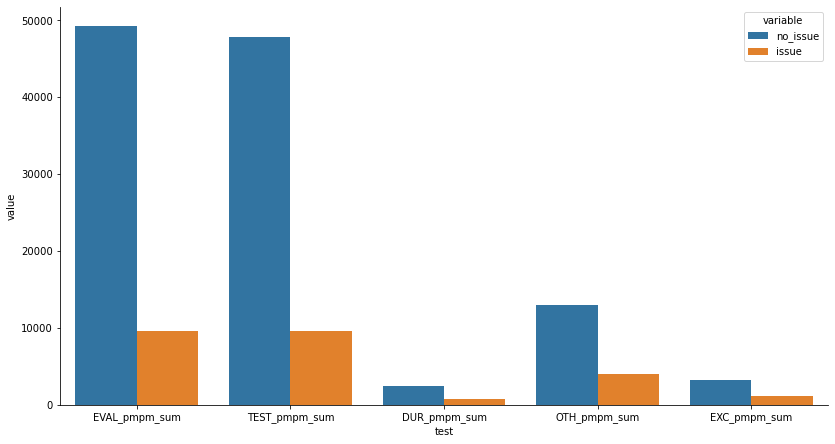

In [17]:
# fig,ax = plt.subplots()
# fig.set_size_inches(18,7)
import seaborn as sns
sns.catplot(x='test', y="value", hue="variable", kind="bar", data=df_visualize, height=6.27, aspect=(11.7/6.27),legend_out = False)


In [18]:
df_visualize

,test,variable,value
0,EVAL_pmpm_sum,no_issue,49269.773245
1,TEST_pmpm_sum,no_issue,47806.391081
2,DUR_pmpm_sum,no_issue,2514.960616
3,OTH_pmpm_sum,no_issue,12982.036707
4,EXC_pmpm_sum,no_issue,3174.813510
5,EVAL_pmpm_sum,issue,9665.637776
6,TEST_pmpm_sum,issue,9629.378053
7,DUR_pmpm_sum,issue,735.713858
8,OTH_pmpm_sum,issue,3965.993758
9,EXC_pmpm_sum,issue,1117.943421


## creating attribute on whether the person used a betos service or not

In [19]:
disease_names = betos_df_sum_ind.columns
import re
remove_lower = lambda text: re.sub('[a-z]', '', text)
betos_issue = [remove_lower(x) for x in disease_names]
df_medical_issue = pd.DataFrame(columns=betos_issue)

df_betos_final = pd.concat([df_summarized,df_medical_issue],axis=1)

indices_columns = list(betos_df_sum_ind.columns)
for i,j in zip(indices_columns, betos_issue):
    print(i,j)
    df_betos_final.loc[df_betos_final[i] >0, j] = 1
    df_betos_final[j] = df_betos_final[j].fillna(0)   


EVAL_ind_sum EVAL__
TEST_ind_sum TEST__
DUR_ind_sum DUR__
OTH_ind_sum OTH__
EXC_ind_sum EXC__


## Summing all the summed attributes

In [20]:
ind_total_sum = [s for s in df_betos_final if 'ind_sum' in s]
pmpm_total_sum = [s for s in df_sum if 'pmpm' in s]
yes_no_sum = [s for s in df_betos_final if '__' in s]

df_betos_final['yes_no_sum'] = df_betos_final[yes_no_sum].sum(axis=1)
df_betos_final['ind_total_sum'] = df_betos_final[ind_total_sum].sum(axis=1)
df_betos_final['pmpm_total_sum'] = df_betos_final[pmpm_total_sum].sum(axis=1)


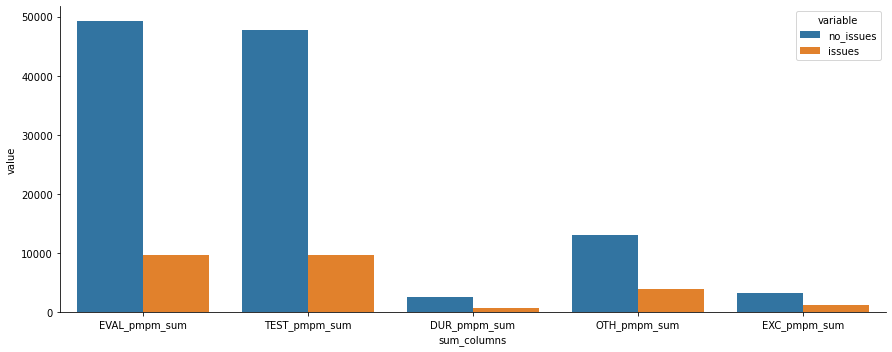

In [84]:
df_visualize = pd.concat([df_betos_final[pmpm_total_sum],df[['transportation_issues']]],axis=1)
df_visualize = df_visualize.groupby(['transportation_issues']).sum().transpose()
df_visualize.reset_index(drop=False,inplace=True)
df_visualize.columns = ['sum_columns','no_issues','issues']

df_visualize = df_visualize.melt(['sum_columns'])

ax = sns.catplot(x="sum_columns", y="value", hue="variable", kind="bar",height=5, 
            aspect=2.5, data=df_visualize,legend_out=False)
# ax.title("asdf")

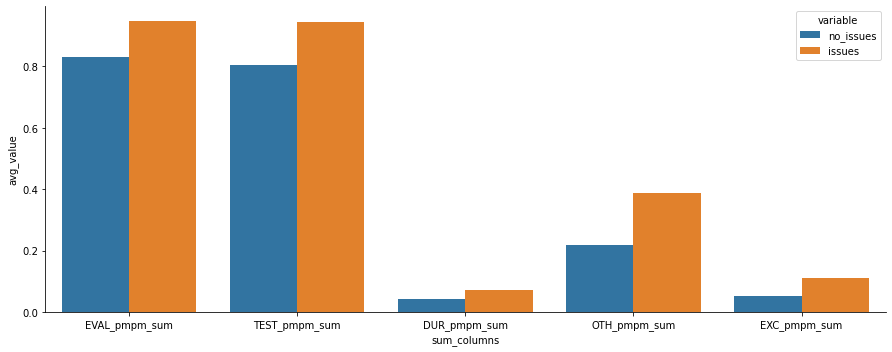

In [78]:
df_visualize['avg_value'] = 0

for index, row in df_visualize.iterrows():
    if row['variable'] == 'no_issues':
        df_visualize.loc[index,'avg_value'] = row['value']/59375
    else:
        df_visualize.loc[index,'avg_value'] = row['value']/10197
    

sns.catplot(x="sum_columns", y="avg_value", hue="variable", kind="bar",height=5, 
            aspect=2.5, data=df_visualize,legend_out=False)

In [23]:
df[df.person_id_syn == 'd97e73MOSe86T74L0Y5A8Ifb']

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
62022,d97e73MOSe86T74L0Y5A8Ifb,0,EM,F,60,0,1,ENG,C5,9.0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
df_visualize = df_betos_final.groupby(['betos_o1a_ind','transportation_issues']).size().transpose()

## bringing percentage of tests done in each category

In [98]:
# df_betos_final['EVAL_ind_perc'] = df_betos_final.EVAL_ind_sum/(len(EVAL_columns)/2)
# df_betos_final['TEST_ind_perc'] = df_betos_final.TEST_ind_sum/(len(TEST_columns)/2)
# df_betos_final['DUR_ind_perc'] = df_betos_final.DUR_ind_sum/(len(DUR_columns)/2)
# df_betos_final['OTH_ind_perc'] = df_betos_final.OTH_ind_sum/(len(OTH_columns)/2)
# df_betos_final['EXC_ind_perc'] = df_betos_final.EXC_ind_sum/(len(EXC_columns)/2)

### Adding the transportation and person_id

In [99]:
df_betos_final['transportation_issues'] = df.transportation_issues
df_betos_final['person_id_syn'] = df.person_id_syn

categorical_columns = [s for s in df_betos_final if '__' in s]
categorical_columns_featured = categorical_columns + ['transportation_issues']

for var in categorical_columns_featured:
    df_betos_final[var] = df_betos_final[var].astype("category")
    
numerical_columns_featured = df_betos_final.select_dtypes(exclude='category').columns

# For original data

In [100]:
# df= pd.read_csv('2020_Competition_Training (1).csv')
betos_df= df.filter(items=['person_id_syn',
'transportation_issues',
'betos_d1c_ind',
'betos_d1c_pmpm_ct',
'betos_d1d_ind',
'betos_d1d_pmpm_ct',
'betos_m1b_ind',
'betos_m1b_pmpm_ct',
'betos_m2c_ind',
'betos_m2c_pmpm_ct',
'betos_m5b_ind',
'betos_m5b_pmpm_ct',
'betos_m5c_ind',
'betos_m5c_pmpm_ct',
'betos_m5d_ind',
'betos_m5d_pmpm_ct',
'betos_o1a_ind',
'betos_o1a_pmpm_ct',
'betos_o1b_ind',
'betos_o1b_pmpm_ct',
'betos_o1e_ind',
'betos_o1e_pmpm_ct',
'betos_o1g_ind',
'betos_o1g_pmpm_ct',
'betos_t1a_ind',
'betos_t1a_pmpm_ct',
'betos_t1b_ind',
'betos_t1b_pmpm_ct',
'betos_t1e_ind',
'betos_t1e_pmpm_ct',
'betos_t1h_ind',
'betos_t1h_pmpm_ct',
'betos_t2a_ind',
'betos_t2a_pmpm_ct',
'betos_y2_ind',
'betos_y2_pmpm_ct'])

In [101]:
categorical_columns = [s for s in betos_df if '_ind' in s]
categorical_columns = categorical_columns + ['transportation_issues']

for var in categorical_columns:
    betos_df[var] = betos_df[var].astype("category")

numerical_columns = betos_df.select_dtypes(exclude='category').columns


In [102]:
categorical_columns = categorical_columns+categorical_columns_featured
numerical_columns = numerical_columns_featured.append(numerical_columns)

In [103]:
def subset_data(df):
    df_no_issue = df[df.transportation_issues == 0]
    df_issue = df[df.transportation_issues == 1]

    df_no_issue_sample = df_no_issue.sample(n=10197)
    df_model_sample = pd.concat([df_no_issue_sample, df_issue])
    return df_model_sample

In [104]:
betos_df = betos_df.drop(["transportation_issues",'person_id_syn'],axis=1)
df_all = pd.concat([df_betos_final,betos_df],axis=1)

In [105]:
ind_total_sum = [s for s in df_betos_final if 'ind_sum' in s]
pmpm_total_sum = [s for s in df_sum if 'pmpm' in s]
yes_no_sum = [s for s in df_betos_final if '__' in s]


In [106]:
# log_df_betos = pd.concat([df_all[ind_total_sum],df_all[yes_no_sum]],axis=1)
# log_df_betos = pd.concat([log_df_betos,df[['transportation_issues','person_id_syn']]],axis=1)

# log_df_betos.to_csv("log_df_betos.csv",index=False)

In [107]:
# df_model_sample = subset_data(betos_df)
# df_model_sample = subset_data(df_betos_final)
df_model_sample = subset_data(df_all)

In [108]:
def train_test_split(df):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    import seaborn as sn
    import matplotlib.pyplot as plt
    y = df['transportation_issues']
    X = df.drop(columns=['transportation_issues','person_id_syn'])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    X_train.reset_index(inplace=True, drop=True)
    X_test.reset_index(inplace=True, drop=True)
    y_train.reset_index(inplace=True, drop=True)
    y_test.reset_index(inplace=True, drop=True)
    return X_train, X_test, y_train, y_test

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_model_sample)

In [110]:
df_model_sample.shape

(10197, 54)

In [111]:
def standardization_encoding(df,df_train,df_test, numerical_columns,categorical_columns):
    categorical_columns = list(filter(lambda w: w not in ['transportation_issues'], list(categorical_columns)))
    numerical_columns = list(filter(lambda w: w not in ['person_id_syn'], list(numerical_columns)))
#     print(categorical_columns, numerical_columns)

    
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    from collections import defaultdict
    d = defaultdict(LabelEncoder)
    # Encoding the variable
    from collections import defaultdict
    d = defaultdict(LabelEncoder)
    
    # Encoding the variable
    cat_model_sample = df[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))
    
    df_train_num = df_train[numerical_columns].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    df_scaled_train = min_max_scaler.fit_transform(df_train_num)
    df_train_num_min_max = pd.DataFrame(df_scaled_train,columns=numerical_columns)
    cat_model_sample = df_train[categorical_columns].apply(lambda x: d[x.name].transform(x))
    df_train = pd.concat([df_train_num_min_max, cat_model_sample],axis=1)
    
    cat_model_sample = df_test[categorical_columns].apply(lambda x: d[x.name].transform(x))  
    df_test_num = df_test[numerical_columns].values
    df_scaled_test = min_max_scaler.transform(df_test_num)
    df_test_num_min_max = pd.DataFrame(df_scaled_test,columns=numerical_columns)
    
    df_test = pd.concat([df_test_num_min_max, cat_model_sample],axis=1)
    
    
    return df_train, df_test

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

X_train,X_test = standardization_encoding(df_all,X_train,X_test, numerical_columns, categorical_columns)
# X_train,X_test = standardization_encoding(X_train,X_test, numerical_columns_featured, categorical_columns_featured)

In [113]:
X_train.shape

(7647, 52)

In [114]:
# X_train.drop(X_train[[c for c in [s for s in X_train if '_perc' in s] if c in X_train]].columns,axis=1,inplace=True)
# X_test.drop(X_test[[c for c in [s for s in X_test if '_perc' in s] if c in X_test]].columns,axis=1,inplace=True)

In [115]:
#top 12 features

top_featured = ['betos_o1a_ind',
 'betos_m5b_ind',
 'betos_m5d_ind',
 'betos_t1a_ind',
 'betos_o1a_pmpm_ct',
 'betos_d1d_ind',
 'EXC_ind_sum',
 'betos_o1b_ind',
 'betos_m1b_ind',
 'DUR_ind_sum',
 'EVAL_ind_sum',
 'betos_m5b_pmpm_ct',
 'yes_no_sum']

In [116]:
# X_train=X_train[top_featured_columns]
# X_test = X_test[top_featured_columns]

In [117]:
# df_betos_export = pd.concat([df_all[top_featured],df[['person_id_syn']]],axis=1)
# df_betos_export.columns = [str(col) + '_betos' for col in df_betos_export.columns]
# df_betos_export.to_pickle("df_betos_suraj.pkl")

In [119]:
df_betos_test = pd.concat([df_all[top_featured],df[['person_id_syn']]],axis=1)
df_betos_test.columns = [str(col) + '_betos' for col in df_betos_test.columns]
df_betos_test.to_pickle("df_betos_test_suraj.pkl")

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))

print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))

Accuracy:  0.614041969013532
Accuracy:  0.6151683556717882


/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
RF_clf = RandomForestClassifier(n_estimators=300,max_depth=10)
RF_clf.fit(X_train, y_train)


y_rf_pred_test = RF_clf.predict(X_test)
y_rf_pred_train = RF_clf.predict(X_train)

print(metrics.accuracy_score(y_test, y_rf_pred_test))
# print(classification_report(y_test, y_rf_pred_test))

print(metrics.accuracy_score(y_train, y_rf_pred_train))

0.6173759560698177
0.7092513893429225


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass scoring=roc_auc, n_jobs=-1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


0.6007060207883899
0.7169009480222295


<Figure size 1440x1080 with 0 Axes>

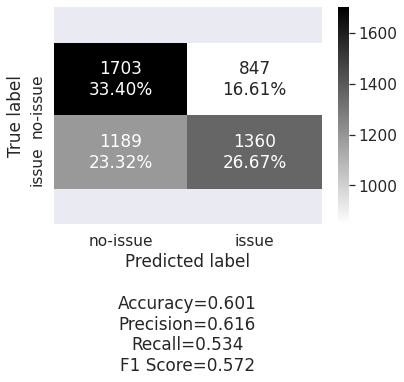

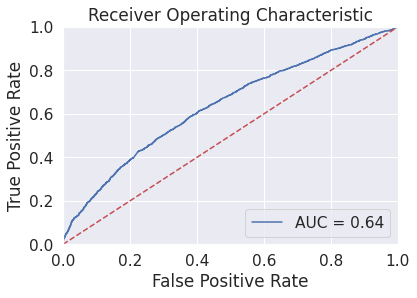

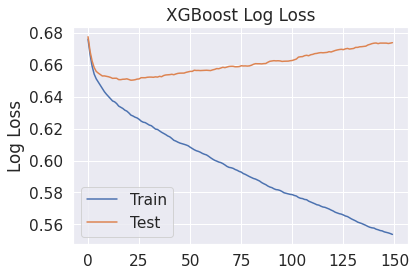

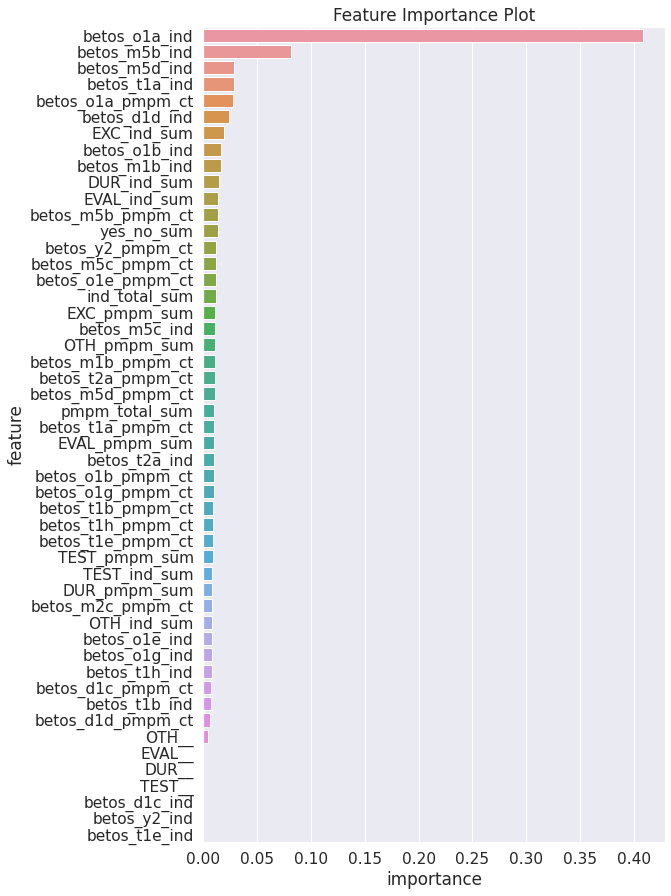

In [72]:

# Hyperparameter tuning grid
params = {'min_child_weight': [5],
        'gamma': [1.5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [4]}

from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
# Initialize XGBoost model, use growth tree algorithm similar to lightgbm
bst = XGBClassifier(n_jobs=-1,grow_policy='lossguide',tree_method ='hist',n_estimators=150)
# Gridsearch on parameter grid, use AUC to determine the best model
cv = GridSearchCV(bst,params,'roc_auc',-1, verbose=10)
# Fit model on the training data, track logloss on training and testing set
cv.fit(X_train, y_train,eval_metric='logloss',eval_set=[(X_train,y_train),(X_test,y_test)],verbose=False)

import cf_matrix
from cf_matrix import make_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score

y_xg_pred_test = cv.best_estimator_.predict(X_test)
y_xg_pred_train = cv.best_estimator_.predict(X_train)

print(metrics.accuracy_score(y_test, y_xg_pred_test))
print(metrics.accuracy_score(y_train, y_xg_pred_train))


cm = confusion_matrix(y_test, y_xg_pred_test)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4) # for label size
make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

import joblib

# Print out the best parameters
cv.best_params_

#save model
joblib.dump(cv.best_estimator_, 'xgb.model')


#load saved model
xgb = joblib.load('xgb.model')


import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# retrieve performance metrics
results = xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss');

# Feature importance plot
feature_importance = pd.DataFrame({'feature':xgb.get_booster().feature_names, 'importance':xgb.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
fig.set_size_inches(8.27,15)
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:50])

In [73]:
feature_importance

,feature,importance
0,betos_o1a_ind,0.408019
1,betos_m5b_ind,0.081365
2,betos_m5d_ind,0.028979
3,betos_t1a_ind,0.028897
4,betos_o1a_pmpm_ct,0.028016
5,betos_d1d_ind,0.023981
6,EXC_ind_sum,0.019629
7,betos_o1b_ind,0.016908
8,betos_m1b_ind,0.016253
9,DUR_ind_sum,0.014807


In [74]:
top_featured_columns = list(feature_importance[feature_importance.importance>0.0].feature)

top_featured_columns

['betos_o1a_ind',
 'betos_m5b_ind',
 'betos_m5d_ind',
 'betos_t1a_ind',
 'betos_o1a_pmpm_ct',
 'betos_d1d_ind',
 'EXC_ind_sum',
 'betos_o1b_ind',
 'betos_m1b_ind',
 'DUR_ind_sum',
 'EVAL_ind_sum',
 'betos_m5b_pmpm_ct',
 'yes_no_sum',
 'betos_y2_pmpm_ct',
 'betos_m5c_pmpm_ct',
 'betos_o1e_pmpm_ct',
 'ind_total_sum',
 'EXC_pmpm_sum',
 'betos_m5c_ind',
 'OTH_pmpm_sum',
 'betos_m1b_pmpm_ct',
 'betos_t2a_pmpm_ct',
 'betos_m5d_pmpm_ct',
 'pmpm_total_sum',
 'betos_t1a_pmpm_ct',
 'EVAL_pmpm_sum',
 'betos_t2a_ind',
 'betos_o1b_pmpm_ct',
 'betos_o1g_pmpm_ct',
 'betos_t1b_pmpm_ct',
 'betos_t1h_pmpm_ct',
 'betos_t1e_pmpm_ct',
 'TEST_pmpm_sum',
 'TEST_ind_sum',
 'DUR_pmpm_sum',
 'betos_m2c_pmpm_ct',
 'OTH_ind_sum',
 'betos_o1e_ind',
 'betos_o1g_ind',
 'betos_t1h_ind',
 'betos_d1c_pmpm_ct',
 'betos_t1b_ind',
 'betos_d1d_pmpm_ct',
 'OTH__']